<a href="https://colab.research.google.com/github/parsashokrollahi/machinelearning2023/blob/main/final_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-learn


In [2]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Create the dataset
data = {
    'Poisonous': [0, 0, 0, 1, 1, 1, 1, 1, None, None, None],
    'Smooth': [0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0],
    'Cap_with_Bruises': [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0],
    'Pungent': [0, 0, 1, 0, 1, 0, 0, 1, None, None, None],
    'Heavy': [0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1],
    'Example': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'U', 'V', 'W']
}

df = pd.DataFrame(data)

# Drop rows with missing values for the Poisonous column
df = df.dropna(subset=['Poisonous'])

# Separate features and labels
X = df.drop(['Poisonous', 'Example'], axis=1)
y = df['Poisonous']

# Create and fit the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

# Display the decision tree
from sklearn.tree import export_text
tree_rules = export_text(clf, feature_names=list(X.columns))
print("Decision Tree Rules:")
print(tree_rules)



Decision Tree Rules:
|--- Smooth <= 0.50
|   |--- Pungent <= 0.50
|   |   |--- class: 0.0
|   |--- Pungent >  0.50
|   |   |--- class: 1.0
|--- Smooth >  0.50
|   |--- Pungent <= 0.50
|   |   |--- class: 1.0
|   |--- Pungent >  0.50
|   |   |--- class: 0.0



In [4]:
# Assuming you have the DecisionTreeClassifier 'clf' from the previous section

# Features for mushrooms U to W
X_test = df[df['Example'].isin(['U', 'V', 'W'])].dropna().drop(['Poisonous', 'Example'], axis=1)

# Check if there are samples in the test set
if X_test.empty:
    print("No samples in the test set. Please check the dataset.")
else:
    # Classify mushrooms U to W
    predictions = clf.predict(X_test)

    # Display the classification results
    classified_results = pd.DataFrame({
        'Example': ['U', 'V', 'W'],
        'Predicted_Poisonous': predictions
    })
    print("Classified Results:")
    print(classified_results)

    # Decision about testing mushrooms U to W
    if (df[df['Example'].isin(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])]['Poisonous'] == 0).all():
        print("\nMushrooms A to H are not poisonous. No need to test U to W.")
    else:
        print("\nMushrooms A to H are known to be poisonous. You may consider testing mushrooms U to W.")



No samples in the test set. Please check the dataset.


In [5]:
# Assuming you have the DecisionTreeClassifier 'clf' from the previous section

# Features for mushrooms U to W
X_test = df[df['Example'].isin(['U', 'V', 'W'])]

# Check the extracted features
print("Features for mushrooms U to W:")
print(X_test)

# Check if there are samples in the test set
if X_test.empty:
    print("No samples in the test set. Please check the dataset.")
else:
    # Drop rows with missing values
    X_test = X_test.dropna().drop(['Poisonous', 'Example'], axis=1)

    # Classify mushrooms U to W
    predictions = clf.predict(X_test)

    # Display the classification results
    classified_results = pd.DataFrame({
        'Example': ['U', 'V', 'W'],
        'Predicted_Poisonous': predictions
    })
    print("\nClassified Results:")
    print(classified_results)

    # Decision about testing mushrooms U to W
    if (df[df['Example'].isin(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])]['Poisonous'] == 0).all():
        print("\nMushrooms A to H are not poisonous. No need to test U to W.")
    else:
        print("\nMushrooms A to H are known to be poisonous. You may consider testing mushrooms U to W.")


Features for mushrooms U to W:
Empty DataFrame
Columns: [Poisonous, Smooth, Cap_with_Bruises, Pungent, Heavy, Example]
Index: []
No samples in the test set. Please check the dataset.


In [6]:
import numpy as np
from sklearn.metrics import mutual_info_score

def entropy(labels):
    # Compute entropy for a set of labels
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    return -np.sum(probabilities * np.log2(probabilities + 1e-10))

def information_gain(parent_labels, feature_values, child_labels):
    # Compute information gain for a feature
    parent_entropy = entropy(parent_labels)
    weighted_child_entropy = np.sum([
        (len(child_labels[i]) / len(parent_labels)) * entropy(child_labels[i])
        for i in range(len(child_labels))
    ])
    return parent_entropy - weighted_child_entropy

# Assuming you have the DecisionTreeClassifier 'clf' and DataFrame 'df' from the previous sections

# Features and labels
features = df.drop(['Poisonous', 'Example'], axis=1)
labels = df['Poisonous']

# Calculate information gain for each feature
info_gains = [information_gain(labels, features[feature], [labels[features[feature] == val] for val in features[feature].unique()])
              for feature in features.columns]

# Display information gain for each feature
info_gain_dict = dict(zip(features.columns, info_gains))
print("Information Gain for Each Feature:")
print(info_gain_dict)


Information Gain for Each Feature:
{'Smooth': 0.04879494069539869, 'Cap_with_Bruises': 0.0032289436203635224, 'Pungent': 0.0032289436203635224, 'Heavy': 0.0032289436203635224}


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from sklearn.datasets import fetch_covtype

from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

import numpy as np

In [16]:

X, y = fetch_covtype(return_X_y=True)

# Display the dimensions of the dataset
print(f'Dimensions of the features: {X.shape}')
print(f'Dimensions of the target: {y.shape}')
fetch = fetch_covtype()
data = fetch.data
target = fetch.target
feature_names = fetch.feature_names

df = pd.DataFrame(data, columns=feature_names)
df['target'] = target

df.head()

Dimensions of the features: (581012, 54)
Dimensions of the target: (581012,)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [17]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area_0                   581012 non-null  float64
 11  Wilderness_Area_1         

In [18]:
# Count the number of samples in each class
unique, counts = np.unique(y, return_counts=True)
print("Class counts before balancing:", dict(zip(unique, counts)))

# Use RandomUnderSampler to balance the classes
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Count the number of samples in each class after balancing
unique_resampled, counts_resampled = np.unique(y_resampled, return_counts=True)
print("Class counts after balancing:", dict(zip(unique_resampled, counts_resampled)))
print('\n')
print("New balanced dataset shape:", X_resampled.shape, y_resampled.shape)


Class counts before balancing: {1: 211840, 2: 283301, 3: 35754, 4: 2747, 5: 9493, 6: 17367, 7: 20510}
Class counts after balancing: {1: 2747, 2: 2747, 3: 2747, 4: 2747, 5: 2747, 6: 2747, 7: 2747}


New balanced dataset shape: (19229, 54) (19229,)


In [19]:

X = X_resampled
y = y_resampled

# Display the dimensions of the dataset
print(f'Dimensions of the features: {X.shape}')
print(f'Dimensions of the target: {y.shape}')


Dimensions of the features: (19229, 54)
Dimensions of the target: (19229,)


In [20]:
# Splitting the dataset into the Training set and Test set (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=93, stratify=y, shuffle=True)

# Display the dimensions of the training and testing sets
print(f'Dimensions of the training features: {X_train.shape}')
print(f'Dimensions of the training target: {y_train.shape}')
print(f'Dimensions of the testing features: {X_test.shape}')
print(f'Dimensions of the testing target: {y_test.shape}')



Dimensions of the training features: (15383, 54)
Dimensions of the training target: (15383,)
Dimensions of the testing features: (3846, 54)
Dimensions of the testing target: (3846,)


Text(0.5, 1.0, 'Decision tree for fetch_covtype dataset')

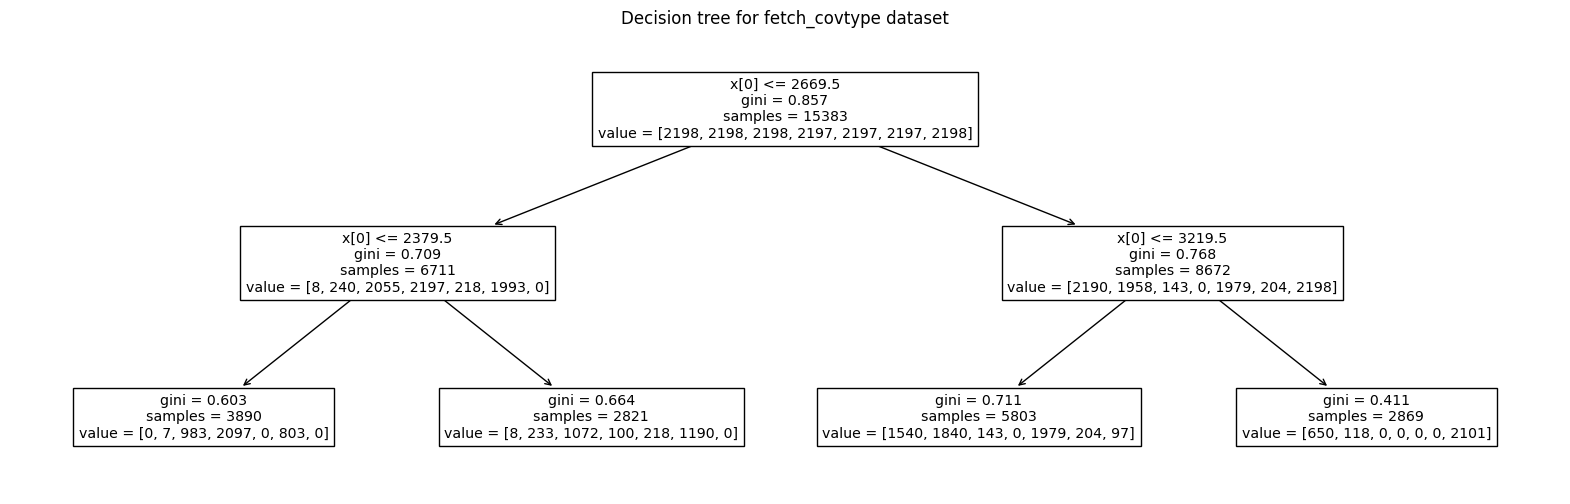

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2, random_state=93)
clf.fit(X_train, y_train)

plt.figure(figsize=(20, 6))
tree.plot_tree(clf)
plt.title('Decision tree for fetch_covtype dataset')



In [24]:
from sklearn.tree import _tree
n_leaves=clf.tree_.n_leaves
n_node_samples=clf.tree_.n_node_samples
max_depth = clf.tree_.max_depth

n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
values = clf.tree_.value

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
n_leaves = np.zeros(shape=n_nodes, dtype=np.int64)
n_node_samples = np.zeros(shape=n_nodes, dtype=np.int64)
max_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)

stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node with value={value} .".format(
                space=node_depth[i] * "\t", node=i, value=values[i]
                #, max_depth = max_depth[i],
                # n_leaves=clf.tree_.n_leaves,
                # n_node_samples=n_node_samples[i]
            )
        )
    else:
        print(
            "{space}node={node} is a split node with value={value}: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}  ,max_depth = {max_depth} , num of leaves = {n_leaves}"
            " ,node sample = {n_node_samples}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
                value=values[i],
                max_depth = max_depth[i],
                n_leaves=clf.tree_.n_leaves,
                n_node_samples=n_node_samples[i]
                # impurity=tree_.impurity[i]

            )
        )


The binary tree structure has 7 nodes and has the following tree structure:

node=0 is a split node with value=[[2198. 2198. 2198. 2197. 2197. 2197. 2198.]]: go to node 1 if X[:, 0] <= 2669.5 else to node 4  ,max_depth = 0 , num of leaves = 4 ,node sample = 0.
	node=1 is a split node with value=[[   8.  240. 2055. 2197.  218. 1993.    0.]]: go to node 2 if X[:, 0] <= 2379.5 else to node 3  ,max_depth = 0 , num of leaves = 4 ,node sample = 0.
		node=2 is a leaf node with value=[[   0.    7.  983. 2097.    0.  803.    0.]] .
		node=3 is a leaf node with value=[[   8.  233. 1072.  100.  218. 1190.    0.]] .
	node=4 is a split node with value=[[2190. 1958.  143.    0. 1979.  204. 2198.]]: go to node 5 if X[:, 0] <= 3219.5 else to node 6  ,max_depth = 0 , num of leaves = 4 ,node sample = 0.
		node=5 is a leaf node with value=[[1540. 1840.  143.    0. 1979.  204.   97.]] .
		node=6 is a leaf node with value=[[ 650.  118.    0.    0.    0.    0. 2101.]] .


In [25]:
clf = tree.DecisionTreeClassifier(max_depth=4, random_state=93)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=93)

Text(0.5, 1.0, 'Decision tree for fetch_covtype dataset')

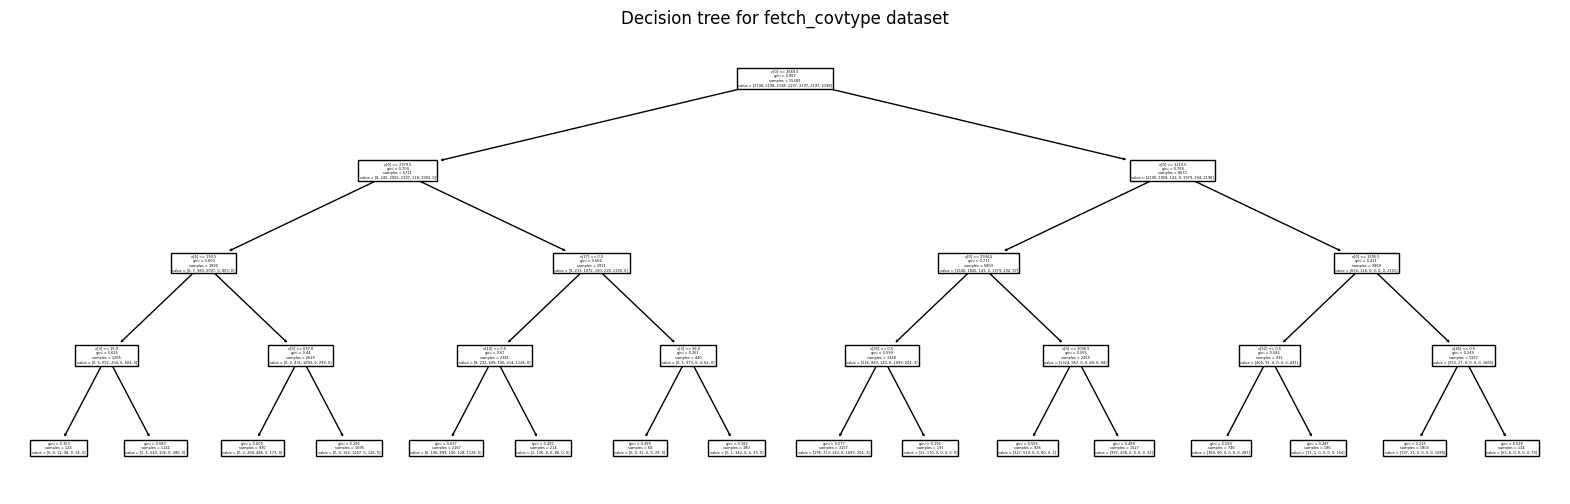

In [26]:
plt.figure(figsize=(20, 6))
tree.plot_tree(clf)
plt.title('Decision tree for fetch_covtype dataset')


In [27]:
from sklearn.tree import _tree
n_leaves=clf.tree_.n_leaves
n_node_samples=clf.tree_.n_node_samples
max_depth = clf.tree_.max_depth

n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
values = clf.tree_.value

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
n_leaves = np.zeros(shape=n_nodes, dtype=np.int64)
n_node_samples = np.zeros(shape=n_nodes, dtype=np.int64)
max_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)

stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node with value={value} .".format(
                space=node_depth[i] * "\t", node=i, value=values[i]
                #, max_depth = max_depth[i],
                # n_leaves=clf.tree_.n_leaves,
                # n_node_samples=n_node_samples[i]
            )
        )
    else:
        print(
            "{space}node={node} is a split node with value={value}: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}  ,max_depth = {max_depth} , num of leaves = {n_leaves}"
            " ,node sample = {n_node_samples}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
                value=values[i],
                max_depth = max_depth[i],
                n_leaves=clf.tree_.n_leaves,
                n_node_samples=n_node_samples[i]
                # impurity=tree_.impurity[i]

            )
        )

The binary tree structure has 31 nodes and has the following tree structure:

node=0 is a split node with value=[[2198. 2198. 2198. 2197. 2197. 2197. 2198.]]: go to node 1 if X[:, 0] <= 2669.5 else to node 16  ,max_depth = 0 , num of leaves = 16 ,node sample = 0.
	node=1 is a split node with value=[[   8.  240. 2055. 2197.  218. 1993.    0.]]: go to node 2 if X[:, 0] <= 2379.5 else to node 9  ,max_depth = 0 , num of leaves = 16 ,node sample = 0.
		node=2 is a split node with value=[[   0.    7.  983. 2097.    0.  803.    0.]]: go to node 3 if X[:, 6] <= 193.5 else to node 6  ,max_depth = 0 , num of leaves = 16 ,node sample = 0.
			node=3 is a split node with value=[[  0.   5. 552. 204.   0. 504.   0.]]: go to node 4 if X[:, 3] <= 15.0 else to node 5  ,max_depth = 0 , num of leaves = 16 ,node sample = 0.
				node=4 is a leaf node with value=[[ 0.  0. 12. 98.  0. 14.  0.]] .
				node=5 is a leaf node with value=[[  0.   5. 540. 106.   0. 490.   0.]] .
			node=6 is a split node with value

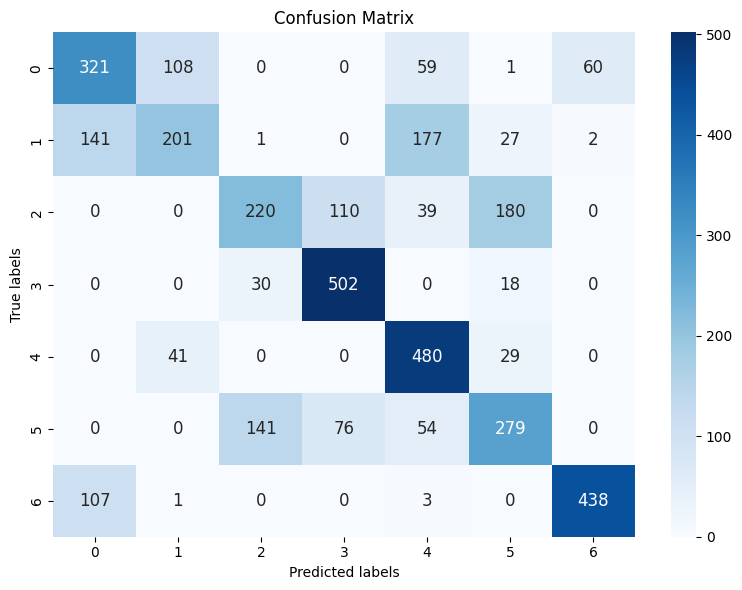

Classification Report:
              precision    recall  f1-score   support

           1       0.56      0.58      0.57       549
           2       0.57      0.37      0.45       549
           3       0.56      0.40      0.47       549
           4       0.73      0.91      0.81       550
           5       0.59      0.87      0.70       550
           6       0.52      0.51      0.51       550
           7       0.88      0.80      0.84       549

    accuracy                           0.63      3846
   macro avg       0.63      0.63      0.62      3846
weighted avg       0.63      0.63      0.62      3846



In [28]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
y_pred = clf.predict(X_test)
# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


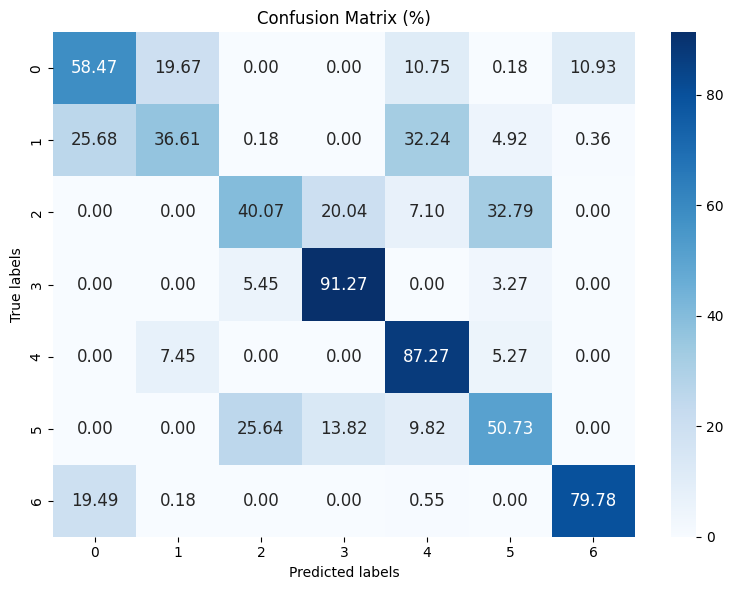

Classification Report:
              precision    recall  f1-score   support

           1       0.56      0.58      0.57       549
           2       0.57      0.37      0.45       549
           3       0.56      0.40      0.47       549
           4       0.73      0.91      0.81       550
           5       0.59      0.87      0.70       550
           6       0.52      0.51      0.51       550
           7       0.88      0.80      0.84       549

    accuracy                           0.63      3846
   macro avg       0.63      0.63      0.62      3846
weighted avg       0.63      0.63      0.62      3846



In [29]:
# Calculating percentages for each cell
cf_matrix_percent = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plotting confusion matrix as a heatmap with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix (%)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix_percentage.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


In [30]:
lf = tree.DecisionTreeClassifier(max_depth=4, random_state=93, ccp_alpha=0.01)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=93)

Text(0.5, 1.0, 'Decision tree for fetch_covtype dataset')

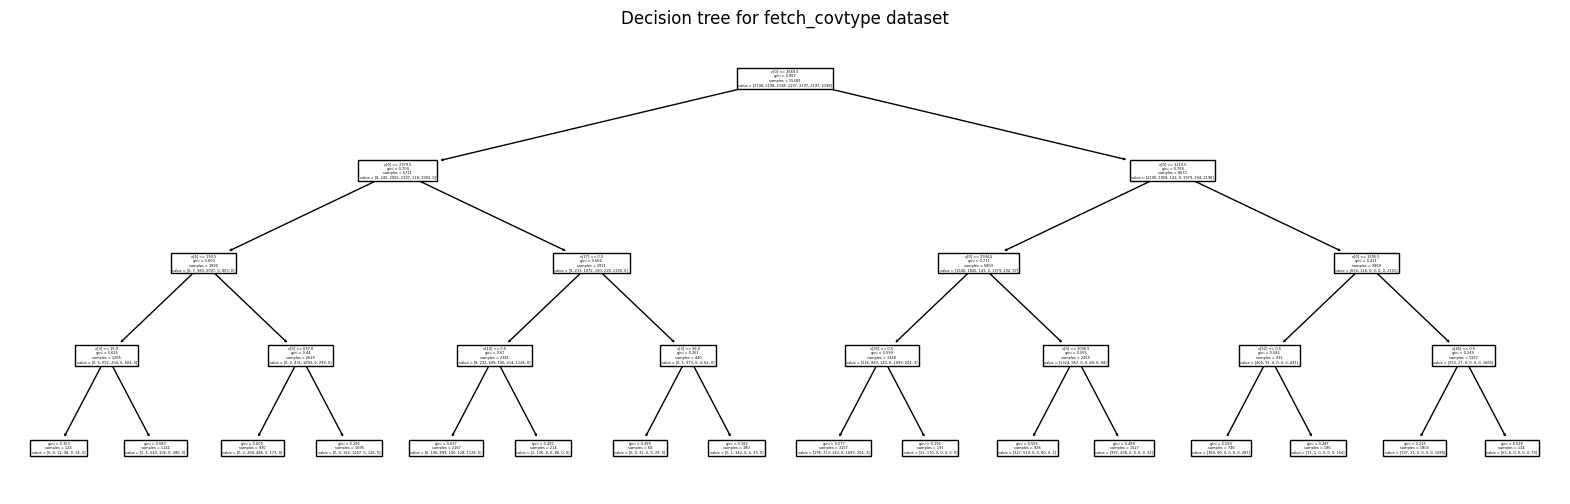

In [31]:
plt.figure(figsize=(20, 6))
tree.plot_tree(clf)
plt.title('Decision tree for fetch_covtype dataset')


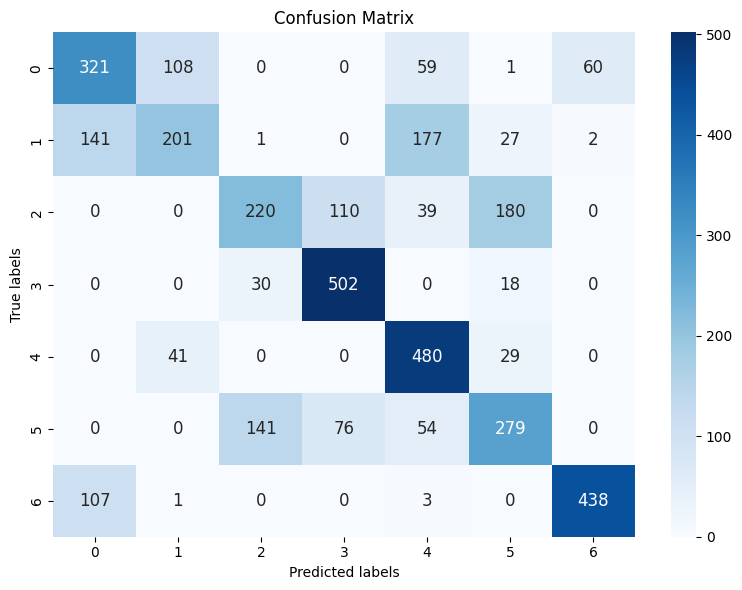

Classification Report:
              precision    recall  f1-score   support

           1       0.56      0.58      0.57       549
           2       0.57      0.37      0.45       549
           3       0.56      0.40      0.47       549
           4       0.73      0.91      0.81       550
           5       0.59      0.87      0.70       550
           6       0.52      0.51      0.51       550
           7       0.88      0.80      0.84       549

    accuracy                           0.63      3846
   macro avg       0.63      0.63      0.62      3846
weighted avg       0.63      0.63      0.62      3846



In [32]:
y_pred = clf.predict(X_test)
# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


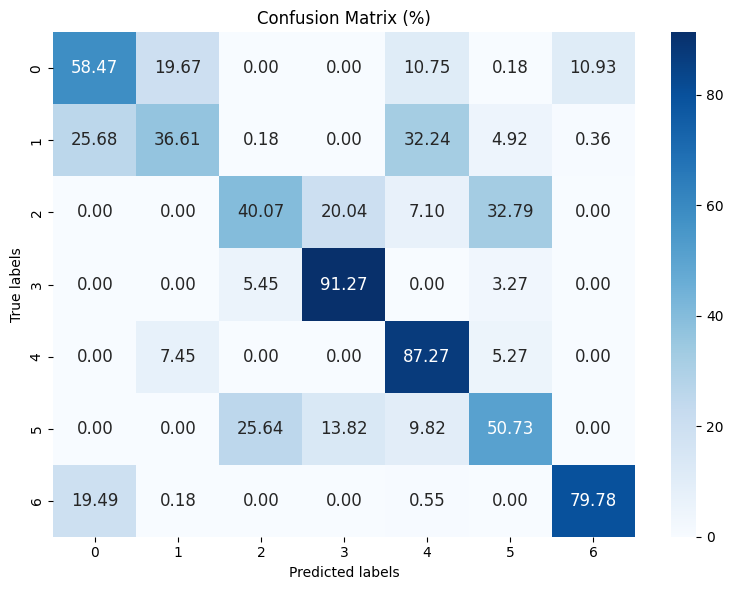

Classification Report:
              precision    recall  f1-score   support

           1       0.56      0.58      0.57       549
           2       0.57      0.37      0.45       549
           3       0.56      0.40      0.47       549
           4       0.73      0.91      0.81       550
           5       0.59      0.87      0.70       550
           6       0.52      0.51      0.51       550
           7       0.88      0.80      0.84       549

    accuracy                           0.63      3846
   macro avg       0.63      0.63      0.62      3846
weighted avg       0.63      0.63      0.62      3846



In [33]:
# Calculating percentages for each cell
cf_matrix_percent = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plotting confusion matrix as a heatmap with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix (%)')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix_percentage.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


In [34]:
clf = tree.DecisionTreeClassifier(max_depth=5, random_state=93, ccp_alpha=0.001, criterion="entropy", min_samples_split=3,	class_weight="balanced", max_leaf_nodes=15)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, class_weight='balanced',
                       criterion='entropy', max_depth=5, max_leaf_nodes=15,
                       min_samples_split=3, random_state=93)

Text(0.5, 1.0, 'Decision tree for fetch_covtype dataset')

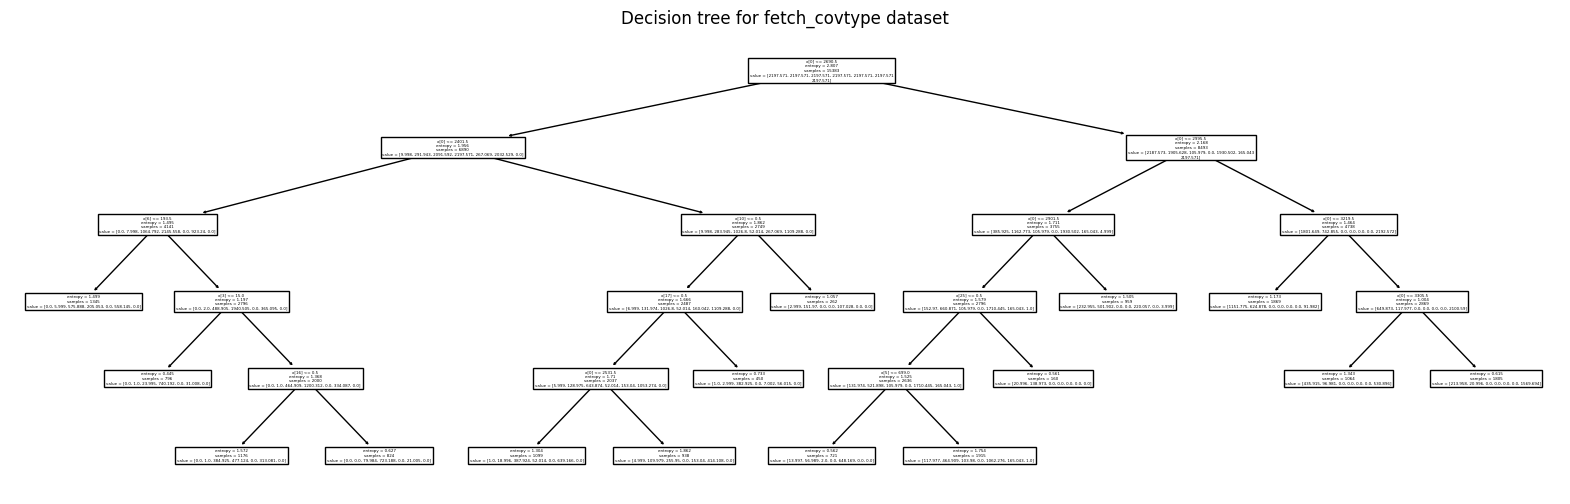

In [35]:
plt.figure(figsize=(20, 6))
tree.plot_tree(clf)
plt.title('Decision tree for fetch_covtype dataset')


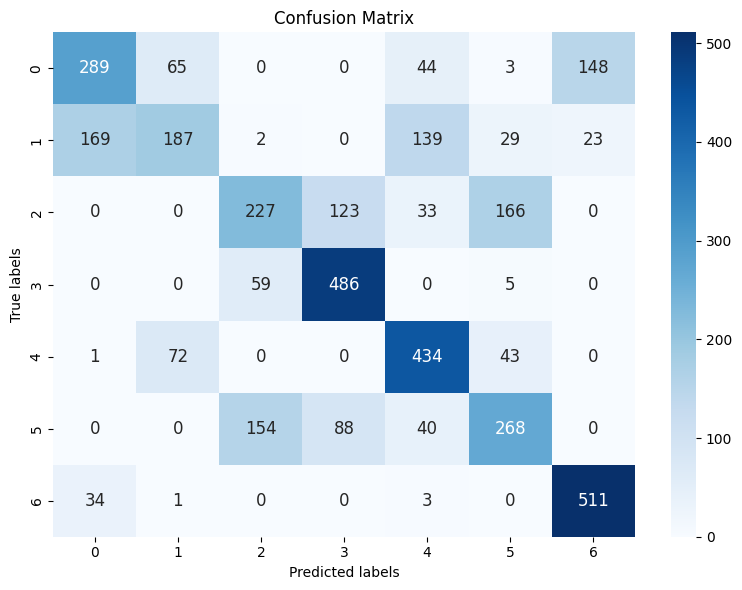

Classification Report:
              precision    recall  f1-score   support

           1       0.59      0.53      0.55       549
           2       0.58      0.34      0.43       549
           3       0.51      0.41      0.46       549
           4       0.70      0.88      0.78       550
           5       0.63      0.79      0.70       550
           6       0.52      0.49      0.50       550
           7       0.75      0.93      0.83       549

    accuracy                           0.62      3846
   macro avg       0.61      0.62      0.61      3846
weighted avg       0.61      0.62      0.61      3846



In [36]:
y_pred = clf.predict(X_test)
# Calculating confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix as a heatmap with fitted text
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 12})

# Get the axis to modify layout
plt.gca().set_ylim(len(np.unique(y_test)), 0)  # Fix for matplotlib 3.1.1 and 3.1.2
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

# Save the plot as PNG
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

# Printing classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.tree import export_text
# Load the datasets
train_data = pd.read_csv('/content/EnergyTrain.csv')
test_data = pd.read_csv('/content/EnergyTest.csv')
print(train_data)
print(test_data)

      Temperature    Demand
0        0.478022 -0.842533
1        0.842468 -0.649433
2        0.646581 -0.671912
3        0.493346 -0.299163
4       -0.690906 -0.550196
...           ...       ...
1163    -0.369882 -1.571197
1164     0.026743 -1.178775
1165     0.447375 -0.689695
1166     0.554223  0.224039
1167     0.081397 -0.786479

[1168 rows x 2 columns]
     Temperature    Demand
0       0.026743 -1.016415
1       0.391189 -0.419063
2       0.391189 -0.501110
3      -1.651954 -0.845400
4      -0.348174 -0.773920
..           ...       ...
287    -0.287390 -1.070657
288     1.009239  1.055430
289     1.039886 -1.138785
290     0.898654  0.641110
291     0.273708 -0.526737

[292 rows x 2 columns]


R2 Score for Decision Tree Regression: 0.5963060018662977


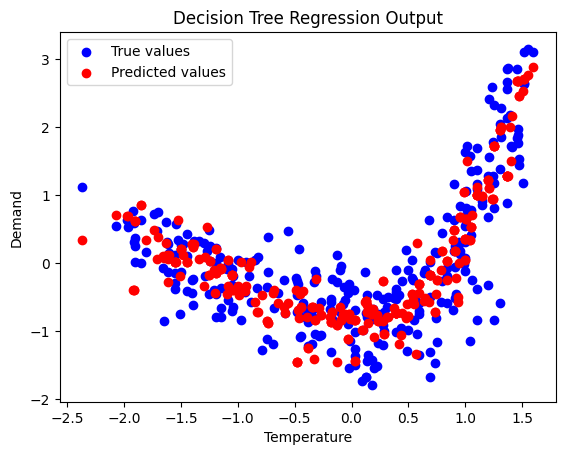

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load the training and testing datasets
train_data = pd.read_csv('/content/EnergyTrain.csv')
test_data = pd.read_csv('/content/EnergyTest.csv')

# Extract features and target variable from the training set
X_train = train_data[['Temperature']]
y_train = train_data['Demand']

# Extract features and target variable from the testing set
X_test = test_data[['Temperature']]
y_test = test_data['Demand']

# Train a Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Evaluate on the testing dataset
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Display R2 score
print("R2 Score for Decision Tree Regression:", r2)

# Plot the output of the decision tree
plt.scatter(X_test, y_test, label='True values', color='blue')
plt.scatter(X_test, y_pred, label='Predicted values', color='red', marker='o')
plt.xlabel('Temperature')
plt.ylabel('Demand')
plt.legend()
plt.title('Decision Tree Regression Output')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



R2 Score for Random Forest: 0.6165341564605344
R2 Score for AdaBoost: 0.6043548424510312


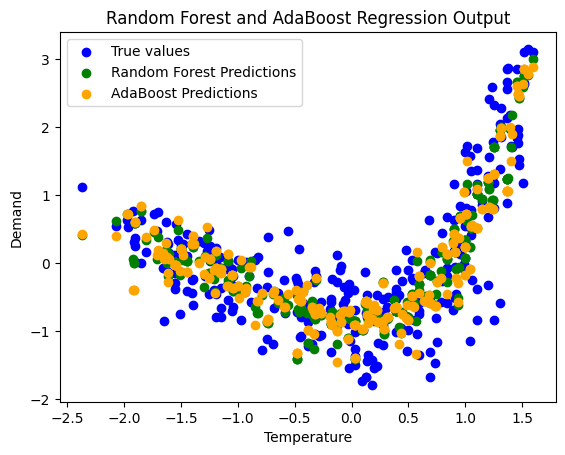

In [43]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

# Train a Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Train an AdaBoost Regressor
ada_regressor = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=42), random_state=42)
ada_regressor.fit(X_train, y_train)

# Evaluate Random Forest on the testing dataset
y_pred_rf = rf_regressor.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)

# Evaluate AdaBoost on the testing dataset
y_pred_ada = ada_regressor.predict(X_test)
r2_ada = r2_score(y_test, y_pred_ada)

# Display R2 scores for Random Forest and AdaBoost
print("\nR2 Score for Random Forest:", r2_rf)
print("R2 Score for AdaBoost:", r2_ada)

# Plot the output of Random Forest and AdaBoost
plt.scatter(X_test, y_test, label='True values', color='blue')
plt.scatter(X_test, y_pred_rf, label='Random Forest Predictions', color='green', marker='o')
plt.scatter(X_test, y_pred_ada, label='AdaBoost Predictions', color='orange', marker='o')
plt.xlabel('Temperature')
plt.ylabel('Demand')
plt.legend()
plt.title('Random Forest and AdaBoost Regression Output')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(



R2 Score for Random Forest: 0.6165341564605344
R2 Score for AdaBoost: 0.6043548424510312


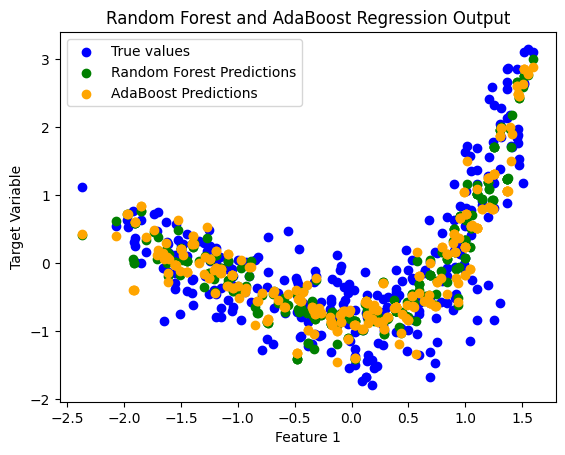